**CS 4774 - ML4VA**

John Fishbein, Nick Newton, Christian Kinzer

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

GET DATA / CLEAN DATA

In [0]:
# school_data = pd.read_csv('ScoresSalsDems.csv')
school_data = pd.read_csv('Updated.csv')
school_data.drop(['Unnamed: 0', 'Level', 'Sch Name', 'Div Name', 'DistrictCity'], inplace=True, axis=1)
# school_data.drop(['Unnamed: 0', 'Level', 'Sch Name', 'Div Name', 'DistrictCity'], inplace=True, axis=1)
school_data

,Div Num,Sch Num,Sch Type,Low Grade,High Grade,Subject,Subgroup,2016-2017 Pass Rate,2017-2018 Pass Rate,2018-2019 Pass Rate,Salary2017Dist,Salary2018Dist,PopulationDist,MedianageDist,PercentWhiteDist,PercentBlackDist,PercentAsianDist,PercentLatinoDist,HighSchoolGraduateDist,SomeCollegeDist,AssociatesDist,BachelorsDist,GraduateDist,MedianIncomeDist,Latitude,Longitude,Rating,PercentLowIncome,Enrollment,ParentRating,NumReviews,PercentAsianSch,PercentBlackSch,PercentHispanicSch,PercentWhiteSch,PercentMultiethSch,PercentNativeSch,StudentsPerTeacher,PercentIslanderSch,MissingRatio,MissingEnrollment
0,1,701,Elem,PK,5,English: Reading,All Students,70,66,64,47512.0,47296.0,32840.0,46.0,68.4,28.4,0.7,8.8,39.0,17.3,6.3,11.4,8.2,42260.0,37.680653,-75.669830,3.0,72.0,550.0,5.0,10.0,3.0,38.0,28.0,31.0,0.0,0.0,14.0,0.0,0.0,0.0
1,1,701,Elem,PK,5,History and Social Sciences,All Students,85,83,84,47512.0,47296.0,32840.0,46.0,68.4,28.4,0.7,8.8,39.0,17.3,6.3,11.4,8.2,42260.0,37.680653,-75.669830,3.0,72.0,550.0,5.0,10.0,3.0,38.0,28.0,31.0,0.0,0.0,14.0,0.0,0.0,0.0
2,1,701,Elem,PK,5,Mathematics,All Students,76,61,79,47512.0,47296.0,32840.0,46.0,68.4,28.4,0.7,8.8,39.0,17.3,6.3,11.4,8.2,42260.0,37.680653,-75.669830,3.0,72.0,550.0,5.0,10.0,3.0,38.0,28.0,31.0,0.0,0.0,14.0,0.0,0.0,0.0
3,1,701,Elem,PK,5,Science,All Students,72,60,79,47512.0,47296.0,32840.0,46.0,68.4,28.4,0.7,8.8,39.0,17.3,6.3,11.4,8.2,42260.0,37.680653,-75.669830,3.0,72.0,550.0,5.0,10.0,3.0,38.0,28.0,31.0,0.0,0.0,14.0,0.0,0.0,0.0
4,1,701,Elem,PK,5,English: Reading,Asian,100,100,100,47512.0,47296.0,32840.0,46.0,68.4,28.4,0.7,8.8,39.0,17.3,6.3,11.4,8.2,42260.0,37.680653,-75.669830,3.0,72.0,550.0,5.0,10.0,3.0,38.0,28.0,31.0,0.0,0.0,14.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57670,98,60,Middle,6,8,English: Reading,White,87,92,85,52505.0,53115.0,67196.0,39.6,76.3,12.8,5.3,6.0,19.0,20.8,10.6,23.2,20.4,86781.0,37.225616,-76.517052,5.0,29.0,746.0,4.0,21.0,4.0,13.0,9.0,65.0,8.0,0.0,16.0,1.0,0.0,0.0
57671,98,60,Middle,6,8,English: Writing,White,76,83,76,52505.0,53115.0,67196.0,39.6,76.3,12.8,5.3,6.0,19.0,20.8,10.6,23.2,20.4,86781.0,37.225616,-76.517052,5.0,29.0,746.0,4.0,21.0,4.0,13.0,9.0,65.0,8.0,0.0,16.0,1.0,0.0,0.0
57672,98,60,Middle,6,8,History and Social Sciences,White,88,93,91,52505.0,53115.0,67196.0,39.6,76.3,12.8,5.3,6.0,19.0,20.8,10.6,23.2,20.4,86781.0,37.225616,-76.517052,5.0,29.0,746.0,4.0,21.0,4.0,13.0,9.0,65.0,8.0,0.0,16.0,1.0,0.0,0.0
57673,98,60,Middle,6,8,Mathematics,White,91,92,92,52505.0,53115.0,67196.0,39.6,76.3,12.8,5.3,6.0,19.0,20.8,10.6,23.2,20.4,86781.0,37.225616,-76.517052,5.0,29.0,746.0,4.0,21.0,4.0,13.0,9.0,65.0,8.0,0.0,16.0,1.0,0.0,0.0


In [0]:
school_data.describe()

,Div Num,Sch Num,High Grade,Salary2017Dist,Salary2018Dist,PopulationDist,MedianageDist,PercentWhiteDist,PercentBlackDist,PercentAsianDist,PercentLatinoDist,HighSchoolGraduateDist,SomeCollegeDist,AssociatesDist,BachelorsDist,GraduateDist,MedianIncomeDist,Latitude,Longitude,Rating,PercentLowIncome,Enrollment,ParentRating,NumReviews,PercentAsianSch,PercentBlackSch,PercentHispanicSch,PercentWhiteSch,PercentMultiethSch,PercentNativeSch,StudentsPerTeacher,PercentIslanderSch,MissingRatio,MissingEnrollment
count,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,5.767500e+04,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.000000,57675.0
mean,62.744378,583.994278,7.239150,55330.179541,56411.776801,2.858688e+05,39.233039,69.890753,18.181006,5.947924,8.830313,25.225025,19.463868,7.472470,20.870266,15.315039,75120.391313,37.908701,-78.048913,5.016451,47.191983,759.836012,3.842333,26.406648,5.955665,21.603277,15.231019,51.653108,5.166831,0.148817,14.101723,0.061569,0.003936,0.0
std,38.461891,536.114010,2.728646,9623.051952,10054.054928,3.622108e+05,4.853361,15.502352,14.370605,6.636096,6.594783,8.856797,4.263230,1.773748,8.112025,8.905721,30258.364115,0.818602,1.454650,2.045950,26.642902,497.130209,0.911318,31.039088,9.137485,22.725419,15.819618,26.827601,2.784889,0.380583,2.442369,0.243170,0.062613,0.0
min,1.000000,10.000000,2.000000,37116.000000,37440.000000,2.213000e+03,21.600000,17.200000,0.000000,0.000000,0.000000,7.300000,8.400000,2.900000,4.500000,2.800000,26971.000000,36.568291,-83.408035,1.000000,0.000000,38.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.0
25%,29.000000,200.000000,5.000000,48696.000000,49174.000000,4.191100e+04,35.800000,60.700000,7.600000,0.900000,3.200000,19.000000,16.400000,6.000000,14.500000,8.900000,48727.000000,37.186195,-78.773354,3.000000,26.000000,460.000000,3.000000,8.000000,1.000000,5.000000,5.000000,30.000000,3.000000,0.000000,13.000000,0.000000,0.000000,0.0
50%,53.000000,450.000000,6.000000,51942.000000,52854.000000,1.301590e+05,38.300000,67.000000,12.800000,3.000000,7.200000,26.000000,20.300000,7.700000,21.800000,13.500000,67196.000000,37.733265,-77.508736,5.000000,46.000000,626.000000,4.000000,20.000000,2.000000,12.000000,9.000000,52.000000,5.000000,0.000000,14.000000,0.000000,0.000000,0.0
75%,93.000000,790.000000,8.000000,65678.000000,65761.000000,3.745580e+05,42.800000,82.400000,28.300000,8.200000,13.500000,32.700000,21.800000,8.900000,26.000000,20.400000,101629.000000,38.768887,-77.240128,6.000000,65.000000,902.000000,4.000000,35.000000,7.000000,31.000000,20.000000,75.000000,7.000000,0.000000,16.000000,0.000000,0.000000,0.0
max,144.000000,5010.000000,12.000000,84390.000000,88323.000000,1.142004e+06,60.500000,99.400000,75.700000,18.900000,37.800000,44.800000,30.000000,12.100000,35.600000,42.500000,129588.000000,39.269447,-75.356628,10.000000,99.000000,4297.000000,5.000000,679.000000,68.000000,98.000000,85.000000,100.000000,21.000000,3.000000,34.000000,2.000000,1.000000,0.0


In [0]:
school_data.dropna(axis=0, how='any', inplace=True)
print(school_data.shape)
school_data = school_data[school_data['2018-2019 Pass Rate'] != '<']
print(school_data.shape)
school_data = school_data[school_data['2016-2017 Pass Rate'] != '<']
print(school_data.shape)
school_data = school_data[school_data['2017-2018 Pass Rate'] != '<']
print(school_data.shape)

school_data['2018-2019 Pass Rate'] = school_data['2018-2019 Pass Rate'].astype('int64')
school_data['2016-2017 Pass Rate'] = school_data['2016-2017 Pass Rate'].astype('int64')
school_data['2017-2018 Pass Rate'] = school_data['2017-2018 Pass Rate'].astype('int64')
# school_data['2018-2019 Pass Rate'].replace('<', )
# pd.to_numeric(school_data['2018-2019 Pass Rate'])#s, downcast='float')



(57675, 41)
(53472, 41)
(52340, 41)
(51733, 41)


In [0]:
school_data['Low Grade'].replace('PK', 0, inplace=True)
school_data['Low Grade'].replace('KG', 0,inplace=True)

In [0]:
school_data['Low Grade'] = school_data['Low Grade'].astype('int64')

In [0]:
school_data['Div Num'].value_counts()

29     7321
75     3519
53     3329
21     2362
43     1809
       ... 
45       45
15       38
23       30
78       29
103      26
Name: Div Num, Length: 117, dtype: int64

In [0]:
school_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51733 entries, 0 to 57674
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Div Num                 51733 non-null  int64  
 1   Sch Num                 51733 non-null  int64  
 2   Sch Type                51733 non-null  object 
 3   Low Grade               51733 non-null  int64  
 4   High Grade              51733 non-null  int64  
 5   Subject                 51733 non-null  object 
 6   Subgroup                51733 non-null  object 
 7   2016-2017 Pass Rate     51733 non-null  int64  
 8   2017-2018 Pass Rate     51733 non-null  int64  
 9   2018-2019 Pass Rate     51733 non-null  int64  
 10  Salary2017Dist          51733 non-null  float64
 11  Salary2018Dist          51733 non-null  float64
 12  PopulationDist          51733 non-null  float64
 13  MedianageDist           51733 non-null  float64
 14  PercentWhiteDist        51733 non-null

In [0]:
# 'Div Name', 'Sch Type', 'Subject', 'Subgroup']
school_data['Subgroup'].value_counts()

All Students                  6260
Male                          6252
Female                        6243
Economically Disadvantaged    6111
White                         6015
Students with Disabilities    5835
Black                         4934
Hispanic                      4595
English Learners              2827
Asian                         2661
Name: Subgroup, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(school_data, test_size=0.2)
train_labels = train_data[['2018-2019 Pass Rate']].copy()
test_labels = test_data[['2018-2019 Pass Rate']].copy()
train_data.drop(['2018-2019 Pass Rate'], axis=1, inplace=True)
test_data.drop(['2018-2019 Pass Rate'], axis=1, inplace=True)
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(41386, 40)
(41386, 1)
(10347, 40)
(10347, 1)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
train_data.head()

,Div Num,Sch Num,Sch Type,Low Grade,High Grade,Subject,Subgroup,2016-2017 Pass Rate,2017-2018 Pass Rate,Salary2017Dist,Salary2018Dist,PopulationDist,MedianageDist,PercentWhiteDist,PercentBlackDist,PercentAsianDist,PercentLatinoDist,HighSchoolGraduateDist,SomeCollegeDist,AssociatesDist,BachelorsDist,GraduateDist,MedianIncomeDist,Latitude,Longitude,Rating,PercentLowIncome,Enrollment,ParentRating,NumReviews,PercentAsianSch,PercentBlackSch,PercentHispanicSch,PercentWhiteSch,PercentMultiethSch,PercentNativeSch,StudentsPerTeacher,PercentIslanderSch,MissingRatio,MissingEnrollment
53719,127,210,Elem,0,5,History and Social Sciences,Female,78,76,56232.0,58270.0,88057.0,38.1,52.1,41.8,1.6,4.0,28.0,23.9,9.5,16.3,11.0,68089.0,36.766495,-76.588890,3.0,91.0,594.0,2.000000,27.000000,1.0,63.0,6.0,24.0,5.0,0.0,15.0,0.0,0.0,0.0
11811,29,560,Elem,0,6,English: Reading,Asian,57,67,68883.0,71076.0,1142004.0,37.9,62.5,9.7,18.9,16.2,12.9,13.2,5.4,31.0,29.7,117515.0,38.771809,-77.060982,4.0,34.0,558.0,5.000000,35.000000,3.0,8.0,30.0,51.0,7.0,1.0,11.0,1.0,0.0,0.0
29514,53,420,High,9,12,Science,All Students,96,96,65678.0,69021.0,374558.0,35.8,67.0,7.6,17.2,13.5,12.9,14.8,6.0,35.4,24.4,129588.0,38.992500,-77.530952,9.0,4.0,1764.0,4.000000,41.000000,24.0,5.0,8.0,57.0,5.0,0.0,16.0,0.0,0.0,0.0
47422,80,470,High,9,12,History and Social Sciences,Female,96,95,51942.0,51397.0,93419.0,43.7,88.7,5.8,2.9,2.8,25.9,20.8,10.7,23.1,11.6,62134.0,37.213402,-80.000702,8.0,17.0,1014.0,4.000000,20.000000,4.0,5.0,4.0,81.0,5.0,0.0,22.0,0.0,0.0,0.0
5875,14,1000,High,8,12,Science,Male,66,71,43750.0,44366.0,22611.0,46.3,95.5,2.8,0.5,0.3,36.4,17.8,6.6,6.7,4.1,30828.0,37.093372,-82.128845,5.0,81.0,136.0,3.890085,23.906321,0.0,0.0,0.0,100.0,0.0,0.0,6.0,0.0,0.0,0.0


In [0]:
print(school_data.Longitude.min(),school_data.Longitude.max())
print(school_data.Latitude.min(),school_data.Latitude.max())

-83.408035 -75.356628
36.568291 39.269447


In [0]:
school_data['2018-2019 Pass Rate'].max()

100

No handles with labels found to put in legend.


[0, 0.2, 0.4, 0.6, 0.8, 1]


<Figure size 720x504 with 0 Axes>

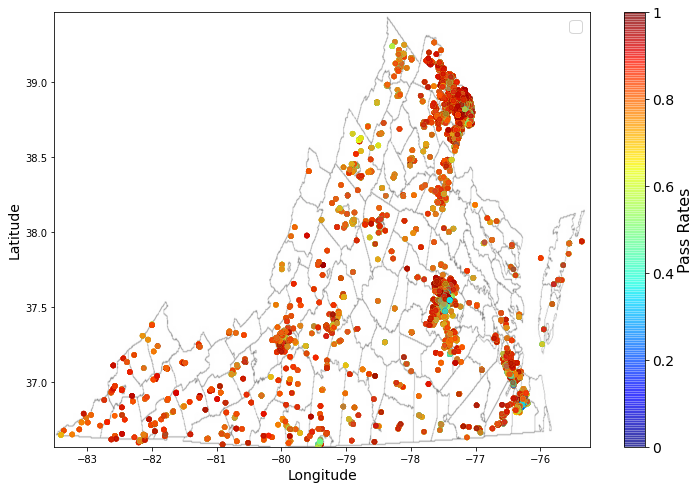

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# plt.scatter(school_data.Latitude, school_data.Longitude)
# plt.figure(figsize=(10,8))
# plt.scatter(school_data.Longitude, school_data.Latitude)
# va_img =mpimg.imread('virginia.png')
va_img = plt.imread('virginia2.png')
plt.figure(figsize=(10,7))

ax = school_data.plot(kind='scatter', x='Longitude', y='Latitude', figsize=(12,8),
                alpha=0.3,
                # s=school_data['PopulationDist']/100,
                 c=school_data['2018-2019 Pass Rate']/100,
                 cmap=plt.get_cmap('jet'), colorbar=False)

plt.imshow(va_img, extent=[-83.508035, -75.23, 36.568291,39.469447], alpha=0.5,
           cmap=plt.get_cmap("jet"),aspect='auto')




plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

rates = school_data["2018-2019 Pass Rate"]
# tick_values = np.linspace(rates.min(), rates.max(), 101)
tick_values = [0, 0.2,0.4,0.6,0.8,1]
print(tick_values)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(tick_values, fontsize=14)
cbar.set_label('Pass Rates', fontsize=16)


plt.legend(fontsize=16)

plt.show()



In [0]:
train_data_num = train_data.drop(['Sch Type', 'Subject', 'Subgroup'], axis=1)
train_data_cat = train_data[['Sch Type', 'Subject', 'Subgroup']]

In [0]:
sch_types = list(train_data_cat['Sch Type'].value_counts().index)
print(sch_types)

subject_types = list(train_data_cat['Subject'].value_counts().index)
print(subject_types)

subgroup_types = list(train_data_cat['Subgroup'].value_counts().index)
print(subgroup_types)

cat_feature_types = sch_types.copy()
cat_feature_types.extend(subject_types.copy())
cat_feature_types.extend(subgroup_types.copy())

print(len(cat_feature_types))

['Elem', 'Middle', 'High', 'Combined']
['Mathematics', 'English: Reading', 'Science', 'History and Social Sciences', 'English: Writing']
['Male', 'All Students', 'Female', 'Economically Disadvantaged', 'White', 'Students with Disabilities', 'Black', 'Hispanic', 'English Learners', 'Asian']
19


In [0]:
for s in subject_types:
    print(s,':',school_data[school_data.Subject == s]['2018-2019 Pass Rate'].mean())

Mathematics : 77.04916751348394
English: Reading : 69.41835036843356
Science : 72.88764854159164
History and Social Sciences : 75.13508629258155
English: Writing : 66.40830115830116


In [0]:
print(train_data_num.shape)
print(train_data_cat.shape)
train_data.shape

(41386, 37)
(41386, 3)


(41386, 40)

In [0]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

num_attribs = list(train_data_num)
cat_attribs = list(train_data_cat)
# print(num_attribs)
# print(cat_attribs)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

train_data_prep = full_pipeline.fit_transform(train_data)
test_data_prep = full_pipeline.transform(test_data)

In [0]:
print(train_data_prep.shape)
feature_list = num_attribs.copy()
feature_list.extend(cat_feature_types)
len(feature_list)

(41386, 56)


56

# Random Forest Model

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [0]:
params = {
    'n_estimators':[50,100,150],
    'max_depth':[2,4,8,None],
    'max_features':['sqrt', 'log2', None]
}

grid = GridSearchCV(RandomForestRegressor(), params, scoring='neg_mean_squared_error', cv=3)
grid.fit(train_data_prep, train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [0]:
print(np.sqrt(-1*grid.best_score_))
print(grid.best_params_)
model = grid.best_estimator_
model

8.174356860488544
{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 150}


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, train_data_prep, train_labels, scoring='neg_mean_squared_error', cv=3, verbose=True)

avg_rmse = 0
for score in scores:
    rmse = np.sqrt(-1*score)
    avg_rmse += rmse

print('Cross Val RMSE:', avg_rmse/3)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Cross Val RMSE: 8.185367559058042


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   38.7s finished


In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
y_train = model.predict(train_data_prep)
rmse = np.sqrt(mean_squared_error(train_labels, y_train))
mae = mean_absolute_error(train_labels, y_train)
print('RMSE:', rmse)
print('MAE:', mae)

RMSE: 2.952250545342215
MAE: 1.98355348829717


In [0]:

ypred = model.predict(test_data_prep)
rmse = np.sqrt(mean_squared_error(test_labels, ypred))
mae = mean_absolute_error(test_labels, ypred)
print('Test Results')
print('RMSE:', rmse)
print('MAE:', mae)

Test Results
RMSE: 8.123611546435777
MAE: 5.405253632292774


In [0]:
feature_imp = pd.DataFrame(data=[model.feature_importances_], columns=feature_list).T
feature_imp.columns = ['importance']
feature_imp.sort_values(by='importance', ascending=False)

,importance
2017-2018 Pass Rate,0.657613
2016-2017 Pass Rate,0.047137
History and Social Sciences,0.029523
Rating,0.028280
Enrollment,0.015539
Sch Num,0.012268
PercentLowIncome,0.012005
Longitude,0.010056
NumReviews,0.010044
Latitude,0.009726


# XGBoost model

In [0]:
import xgboost as xgb

dtrain = xgb.DMatrix(train_data_prep, label=train_labels)
dtest = xgb.DMatrix(test_data_prep, label=test_labels)

In [0]:
param = {'max_depth': 3, 'eta': 0.05,
         'objective': 'reg:squarederror',
         'eval_metric': 'rmse',
         "n_estimators" : 300}

stop=50

mod = xgb.train(param, dtrain, num_boost_round=10000,
                evals=[(dtrain, "train"), (dtest, "validation")],
                verbose_eval=True,
                early_stopping_rounds=stop)

Streaming output truncated to the last 5000 lines.
[4436]	train-rmse:6.9077	validation-rmse:8.08896
[4437]	train-rmse:6.90752	validation-rmse:8.08894
[4438]	train-rmse:6.90743	validation-rmse:8.08895
[4439]	train-rmse:6.90739	validation-rmse:8.08893
[4440]	train-rmse:6.90698	validation-rmse:8.08873
[4441]	train-rmse:6.90671	validation-rmse:8.08885
[4442]	train-rmse:6.9065	validation-rmse:8.08879
[4443]	train-rmse:6.90622	validation-rmse:8.08853
[4444]	train-rmse:6.90601	validation-rmse:8.08859
[4445]	train-rmse:6.90583	validation-rmse:8.08853
[4446]	train-rmse:6.90565	validation-rmse:8.08854
[4447]	train-rmse:6.90537	validation-rmse:8.08864
[4448]	train-rmse:6.90517	validation-rmse:8.08864
[4449]	train-rmse:6.90496	validation-rmse:8.08841
[4450]	train-rmse:6.90481	validation-rmse:8.08844
[4451]	train-rmse:6.9045	validation-rmse:8.0883
[4452]	train-rmse:6.90426	validation-rmse:8.08827
[4453]	train-rmse:6.90409	validation-rmse:8.08827
[4454]	train-rmse:6.90395	validation-rmse:8.08823
[44

In [1]:
ypred = mod.predict(dtest)
rmse = np.sqrt(mean_squared_error(test_labels, ypred))
mae = mean_absolute_error(test_labels, ypred)
print('RMSE:', rmse)
print('MAE:', mae)

NameError: ignored

# Multiple Linear Regression Model

In [0]:
import sklearn.linear_model as linear

In [0]:
lr = linear.LinearRegression()

In [0]:
lr.fit(train_data_prep, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
ypred = lr.predict(train_data_prep)
rmse = np.sqrt(mean_squared_error(train_labels, ypred))
mae = mean_absolute_error(train_labels, ypred)
print('***Train***')
print('RMSE:', rmse)
print('MAE:', mae)

print('\n***Test***')

ypred = lr.predict(test_data_prep)
rmse = np.sqrt(mean_squared_error(test_labels, ypred))
mae = mean_absolute_error(test_labels, ypred)
print('RMSE:', rmse)
print('MAE:', mae)

***Train***
RMSE: 9.15412044037243
MAE: 6.440506287733513

***Test***
RMSE: 9.27792237334354
MAE: 6.470206284805893


# Lasso Regularization

In [0]:
from sklearn.linear_model import Lasso, LassoCV
lassocv = LassoCV(n_alphas=1000,cv=5,verbose=True)
lassocv.fit(train_data_prep, train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=1000, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=True)

In [0]:
p =lassocv.predict(train_data_prep)
np.sqrt(mean_squared_error(p, train_labels))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

array([0.76063029, 0.75162346, 0.75774377])

In [0]:
scores = cross_val_score(lassocv, train_data_prep, train_labels, cv=3, scoring='neg_mean_squared_error')
np.sqrt(np.mean(scores))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

nan

In [0]:
np.sqrt(-1*np.mean(scores))

9.16974927791056

In [0]:
lasso_coefs = pd.DataFrame(data=[lassocv.coef_], columns=feature_list).T
lasso_coefs.columns = ['Lasso Coeficent']
lasso_coefs[lasso_coefs['Lasso Coeficent'] ==0]

,Lasso Coeficent
High Grade,0.0
Salary2017Dist,-0.0
PercentWhiteDist,-0.0
PercentBlackDist,0.0
HighSchoolGraduateDist,0.0
SomeCollegeDist,-0.0
Enrollment,0.0
PercentBlackSch,0.0
PercentWhiteSch,-0.0
MissingEnrollment,0.0


In [0]:
lasso_coefs.shape
feature_imp.shape

(56, 1)

In [0]:
x =pd.concat([feature_imp, lasso_coefs], axis=1)
x[x['Lasso Coeficent'] > 1]

,importance,Lasso Coeficent
2016-2017 Pass Rate,0.047137,2.999417
2017-2018 Pass Rate,0.657613,8.365509
Rating,0.028280,4.045656
History and Social Sciences,0.029523,7.376023
English: Writing,0.005054,2.433290
Male,0.000596,1.776247
All Students,0.003064,5.000824
Students with Disabilities,0.001136,2.133639
Hispanic,0.001069,1.443565
Asian,0.002221,4.195986
